## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [1]:
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

Using TensorFlow backend.


### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train_num), (x_test, y_test_num) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [17]:
print("Training Samples : ", x_train.shape[0])

Training Samples :  60000


In [18]:
print("Testing samples : ", x_test.shape[0])

Testing samples :  10000


### Find dimensions of an image in the dataset

In [30]:
print("Dimension of an image : ", x_train[0].shape)

Dimension of an image :  (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = keras.utils.to_categorical(y_train_num, 10)

In [0]:
y_test = keras.utils.to_categorical(y_test_num, 10)

In [31]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [44]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print("X Train type ", x_train.dtype)
print("X Test type ", x_test.dtype)

X Train type  float32
X Test type  float32


In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [54]:
x_train[0].shape

(28, 28, 1)

In [55]:
x_test[0].shape

(28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [57]:
model = Sequential()

#Adding 1st CL
model.add(Convolution2D(32,3,3, input_shape=(28,28,1)))
model.add(Activation('relu'))

#Adding 2nd CL
model.add(Convolution2D(32,3,3))
model.add(Activation('relu'))

#Flatting
model.add(Flatten())

#1st Fully connected layer
model.add(Dense(128))
model.add(Activation('relu'))

#2nd Fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))

#Adding loss and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Adding early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model.fit(x_train, y_train, batch_size=32, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 18s 307us/step - loss: 0.6794 - acc: 0.7502 - val_loss: 4.3524 - val_acc: 0.7240
Epoch 2/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.4780 - acc: 0.8267 - val_loss: 3.8967 - val_acc: 0.7504
Epoch 3/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.4306 - acc: 0.8464 - val_loss: 4.6330 - val_acc: 0.7061
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.3966 - acc: 0.8557 - val_loss: 4.5680 - val_acc: 0.7054
Epoch 5/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.3704 - acc: 0.8665 - val_loss: 5.1090 - val_acc: 0.6738
Epoch 6/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.3491 - acc: 0.8734 - val_loss: 5.1967 - val_acc: 0.6709
Epoch 7/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.3266 - acc: 0.8805 - val_

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [58]:
model2 = Sequential()

#Adding 1st CL
model2.add(Convolution2D(32,3,3, input_shape=(28,28,1)))
model2.add(Activation('relu'))

#Adding 2nd CL
model2.add(Convolution2D(32,3,3))
model2.add(Activation('relu'))

#Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))

#Dropout
model2.add(Dropout(0.25))

#Flatting
model2.add(Flatten())

#1st Fully connected layer
model2.add(Dense(128))
model2.add(Activation('relu'))

#2nd Fully connected layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

#Adding loss and optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Adding early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model2.fit(x_train, y_train, batch_size=32, nb_epoch=10, validation_data=(x_test, y_test), callbacks=callback_list)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 146us/step - loss: 0.7478 - acc: 0.7232 - val_loss: 4.5679 - val_acc: 0.7063
Epoch 2/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.5391 - acc: 0.7982 - val_loss: 4.7549 - val_acc: 0.6979
Epoch 3/10
60000/60000 [==============================] - 8s 137us/step - loss: 0.4889 - acc: 0.8192 - val_loss: 3.9795 - val_acc: 0.7433
Epoch 4/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.4535 - acc: 0.8327 - val_loss: 3.7780 - val_acc: 0.7560
Epoch 5/10
60000/60000 [==============================] - 8s 136us/step - loss: 0.4180 - acc: 0.8480 - val_loss: 3.6152 - val_acc: 0.7654
Epoch 6/10
60000/60000 [==============================] - 9s 145us/step - loss: 0.3797 - acc: 0.8612 - val_loss: 4.1828 - val_acc: 0.7307
Epoch 7/10
60000/60000 [==============================] - 8s 139us/step - loss: 0.3523 - acc: 0.8709 - val_loss: 3.8712 - 

In [59]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)             

In [60]:
x_train.shape

(60000, 28, 28, 1)

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

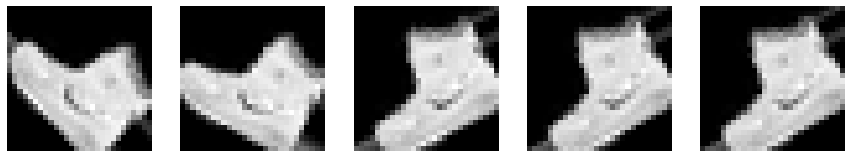

In [64]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [65]:
model3 = Sequential()

#Adding 1st CL
model3.add(Convolution2D(32,3,3, input_shape=(28,28,1)))
model3.add(Activation('relu'))

#Adding 2nd CL
model3.add(Convolution2D(32,3,3))
model3.add(Activation('relu'))

#Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))

#Dropout
model3.add(Dropout(0.25))

#Flatting
model3.add(Flatten())

#1st Fully connected layer
model3.add(Dense(128))
model3.add(Activation('relu'))

#2nd Fully connected layer
model3.add(Dense(10))
model3.add(Activation('softmax'))

#Adding loss and optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Adding early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

model3.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validat

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.1871 - acc: 0.5621 - val_loss: 6.0685 - val_acc: 0.6172
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.8609 - acc: 0.6814 - val_loss: 5.6218 - val_acc: 0.6442
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7913 - acc: 0.7043 - val_loss: 5.4074 - val_acc: 0.6601
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7534 - acc: 0.7176 - val_loss: 5.3840 - val_acc: 0.6618
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7318 - acc: 0.7257 - val_loss: 5.3638 - val_acc: 0.6638
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7201 - acc: 0.7290 - val_loss: 5.5346 - val_acc: 0.6521
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7051 - acc: 0.7349 - val_loss: 5.8343 - val_acc: 0.6337
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [66]:
print(model3.evaluate(x_train, y_train))

60000/60000 [==============================] - 3s 52us/step
[0.5913138962030411, 0.7790333333333334]


In [67]:
print(model3.evaluate(x_test, y_test))

10000/10000 [==============================] - 1s 53us/step
[5.39378388710022, 0.6624]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [69]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

170500096/170498071 [==============================] - 13s 0us/step


In [73]:
x_train.shape

(50000, 32, 32, 3)

In [74]:
x_test.shape

(10000, 32, 32, 3)

In [0]:
x_train = x_train/255

In [0]:
x_train = x_train.astype('float32')

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

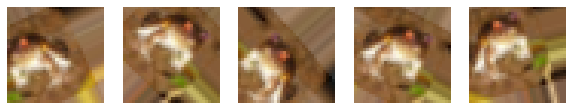

In [95]:
gen = datagen.flow(x_train[0:1], batch_size=1)
plt.rcParams["figure.figsize"] = (10,2)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()